Royal Mail have provided a simple dataset for a careers seminar they were holding. The challenge was to create a model that can make predictions for delivery times.

The dataset is available on Google Drive here: https://drive.google.com/file/d/1zLvi3Tlwf_dARKmX-mGOkYWns4iyHDfo/view

In [1]:
#Importing modules and reading in the data.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("ParcelDeliveryTimes.csv")

#checking the basic attributes of the dataframe
print(df.shape)
print(df.describe())
print(df.info())

df.head()

(3552, 7)
       minuteOfDay
count  3552.000000
mean    590.613739
std      61.947371
min     401.000000
25%     546.000000
50%     586.000000
75%     630.000000
max     840.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 7 columns):
date             3552 non-null object
weather          3552 non-null object
traffic          3552 non-null object
weekday          3552 non-null object
deliveryPoint    3552 non-null object
minuteOfDay      3552 non-null int64
deliveryTime     3552 non-null object
dtypes: int64(1), object(6)
memory usage: 194.3+ KB
None


,date,weather,traffic,weekday,deliveryPoint,minuteOfDay,deliveryTime
0,2016-01-01,sun,normal,Friday,dp_A,443,07:23:00
1,2016-01-02,sun,heavy,Saturday,dp_A,532,08:52:00
2,2016-01-04,sun,heavy,Monday,dp_A,516,08:36:00
3,2016-01-05,rain,normal,Tuesday,dp_A,558,09:18:00
4,2016-01-06,rain,normal,Wednesday,dp_A,640,10:40:00


In [2]:
#checking the unique categories for the categorical attributes.
print(df['deliveryPoint'].unique())
print(df['weather'].unique())
print(df['traffic'].unique())
print(df['weekday'].unique())

['dp_A' 'dp_B' 'dp_C' 'dp_D']
['sun' 'rain']
['normal' 'heavy']
['Friday' 'Saturday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']


From this we can see that there are 7 features and 3552 instances in the data. There are not missing features for any of the instances in the data. It also appears that there is only one continuous variable, minuteofDay, in the dataset. minuteofDay and deliveryTime appear to be the same thing. 

I'm now going to plot the distributions of the different features.

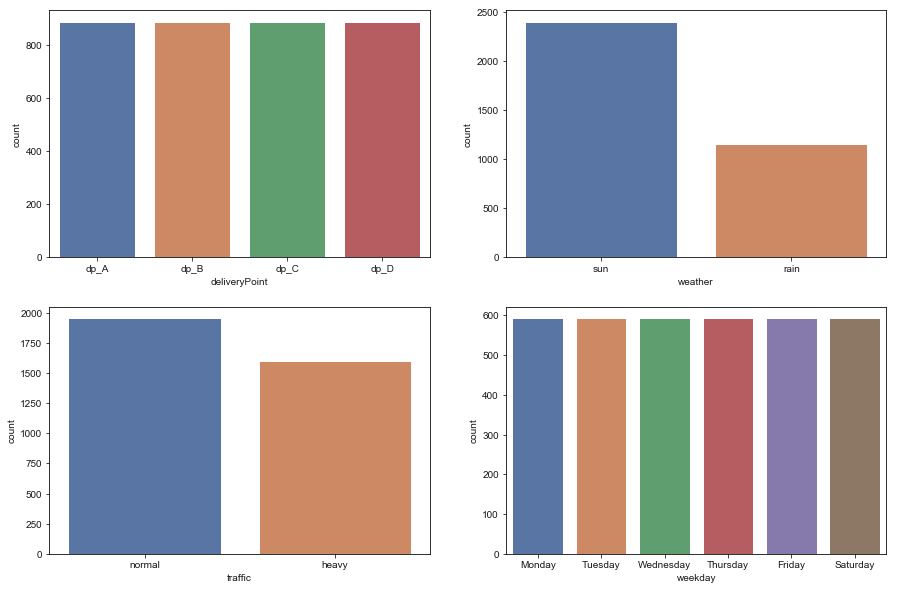

In [3]:
fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2);
sns.set(style="whitegrid");
sns.countplot(x="deliveryPoint", data=df, ax=ax[0][0]);
sns.countplot(x="weather", data=df, ax=ax[0][1]);
sns.countplot(x="traffic", data=df, ax=ax[1][0]);
sns.countplot(x="weekday", data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ax=ax[1][1]);

From this we can see that the deliveries are evenly split over the delivery points and the days of the week (Royal Mail does not deliver on Sunday!). There is a difference in the traffic conditions and the weather - more deliveries are made when the weather is sunny and more are made when the traffic is normal. This seems to make intuitive sense as when the traffic is normal or the weather is sunny the delivery drivers can drive at a higher average speed and therefore visit more delivery destinations in a given time period.

C:\Users\Sam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


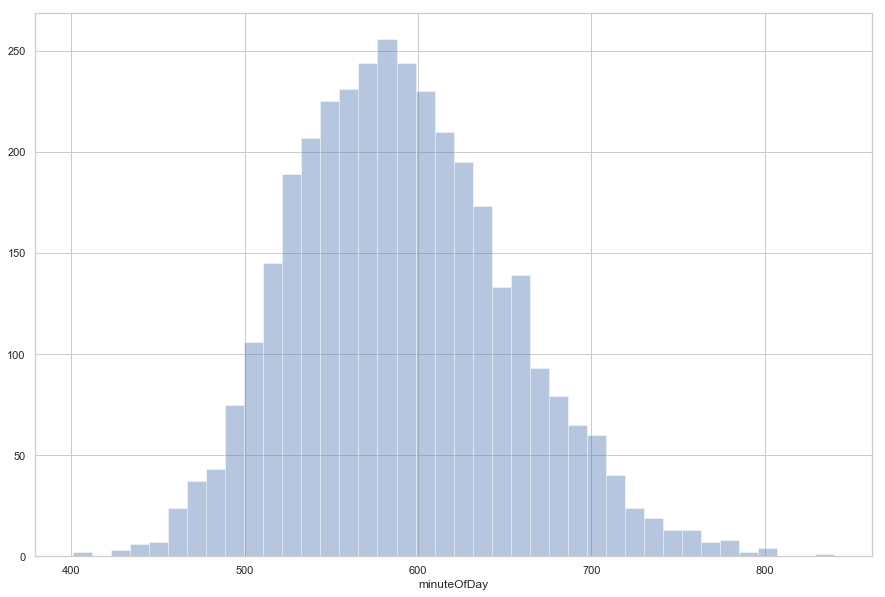

In [4]:
sns.distplot(df['minuteOfDay'], kde=False);
ax = plt.gcf();
ax.set_size_inches(15, 10);

Above we can see the overall distribution for the minuteOfDay attribute. This is the number of minutes after midnight at which each delivery was made (in other words a delivery made at 600 minutes was actually delivered at 10:00am). The distribution of the delivery times is normally distributed with a slight right skew.

Assuming a normal distribution and applying the 68-95-99.7 rule, we can predict that ~68% of deliveries will be made in the interval 528 minutes to 652 minutes (using figures for the mean ans standard deviation of 590.613739 and 61.947371 respectively) and that ~95% of deliveries will be delivered in the interval 466 minutes to 714 minutes. In other words ~68% of deliveries will be made between 8:48 am and 10:52am and ~95% of deliveries will be made between 7:46am and 11:54am.

From this we can see that the majority of customers will get their delivery before midday. However this does not allow us to make a prediction for a given delivery and is also very unhelpful for customers as all we are saying is that the delivery will be made at some time in a ~4 hour window.

Having looked at the overall distribution of the delivery times it would be interesting to look at whether this varies with respect to the different features. We might find that different delivery points have a different distribution.

C:\Users\Sam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


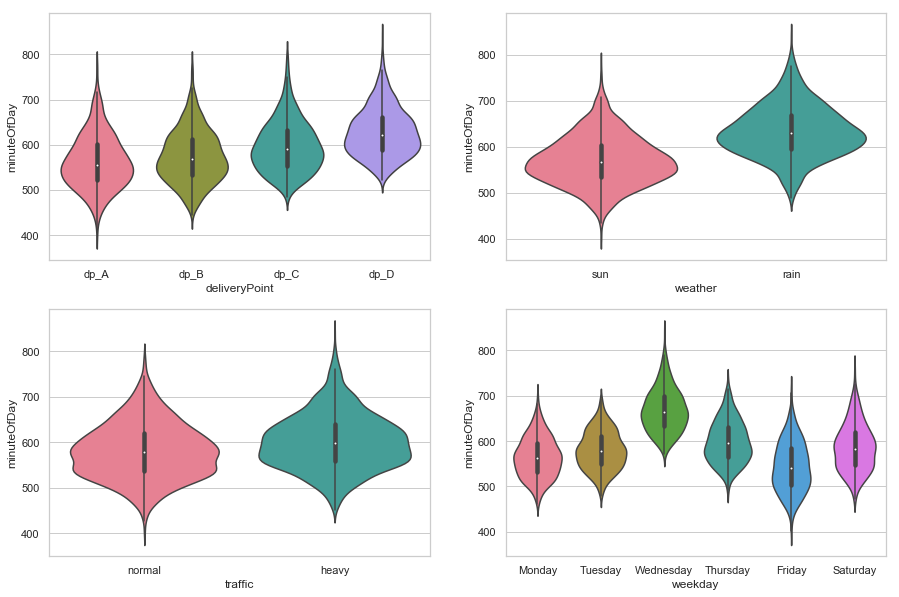

In [5]:
fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2);
sns.set(style="whitegrid");
sns.violinplot(x="deliveryPoint",y="minuteOfDay", palette="husl", data=df, ax=ax[0][0]);
sns.violinplot(x="weather", y="minuteOfDay", palette="husl", data=df, ax=ax[0][1]);
sns.violinplot(x="traffic", y="minuteOfDay", palette="husl", data=df, ax=ax[1][0]);
sns.violinplot(x="weekday", y="minuteOfDay", palette="husl", data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ax=ax[1][1]);

From these plots we can see that the delivery time does vary with respect to the other features. Going in order of the plots we can make the following observations:

Delivery point
Different delivery points have different first and last delivery points. This is likely to do with the location of the delivery point - delivery point D could be located away from a population centre meaning it takes some time for the driver to reach his first delivery and therefore means all deliveries are made later. Delivery point A however is likely located closer to a town centre (possibly even within a town centre) meaning the first delivery can be made much earlier. Delivery points B and C are in between A and D in terms of distance. This means that customers living within delivery point A's catchment area will get their deliveries slightly sooner than if they lived near delivery points B, C or D.

Weather
From this we can see that when the weather is sunny deliveries are started earlier than on days when it rains so customers will get their delivery sooner on days with good weather. The distribution of deliveries through the day is broadly similar regardless of the weather, it appears that it is just the start and end time that vary.

Traffic
From this plot we can see that traffic has an effect on the delivery times. When the traffic is normal, the first and last deliveries are earlier than when the traffic is heavy. Interestingly though it appears that most deliveries are made at around the same point during the day. The previous set of plots shows that the total number of deliveries on days with heavy traffic is lower than on sunny days so while the peaks occur at roughly the same time they do not equate to the same number of deliveries.

Weekday
This plot provides some intereesting and ossibly unexpected insights. We can see that deliveries made on Monday, Tuesday, Thursday and Saturday have a similar set of characteristics. On these days the first and last deliveries are at similar times and it looks like most deliveries are made at the same time of day (although most deliveries are made slightly later on Saturday). Surprisingly on Wedenesday the first delivery isn't until much later (around 1.5 hours later than on Mon, Tue, Thu or Sat) and there is a corresponding delay for the last delivery. Friday shows the opposite trend where the first delivery is around an hour earlier than Mon, Tue, Thu, Sat and as a result the last delivery is earlier in the day.

What is happening here? It's possible that on Fridays the drivers are keen to finish early so that they can start their weekends and thus begin their rounds as early as they can. We don't know whether these are business or residential deliveries - if they were business deliveries then an alternative explanation could be that drivers know businesses will close early on Fridays so it is in their interests to finish the deliveries as soon as possible so that failed deliveries are avoided.

On Wednesdays's there are a couple of explanations - perhaps Weds mornings are when team meetings and trainings are scheduled thereby delaying the start of the deliveries. It could also be something psychological for the drivers: they are at the furthest point from the weekend and thus feeling less inclined to start early.

Either way the take home from this last plot is that as a customer if you want your post promptly then you'll be hoping for a Friday delivery rather than a Wednesday delivery.

Having undertaken an analysis of the data it is now time to start building a model and attempt some predictions. The target variable in this case is the delivery time. This is a continuous variable so it is appropriate to use linear regression techniques to build a model. I will create a first model using a decision tree since there are limited features and the models produced by tree based methods are more easily interpreted.

The target variable is the delivery time (minuteOfDay) which is a number. We are therefore looking at a regression problem.

In [6]:
#Importing ML modules
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


#defining the list of features we wish to use for the input data
features = ['deliveryPoint', 'weather', 'traffic', 'weekday'];

#Setting up the input and reponses and binarizing the categorical features.
#The regression decision tree expects numerical predictors so the categorical features need to be converted to numericals.
X = df[features];
y = df['minuteOfDay'];
X_bin = pd.get_dummies(X);

#Splitting into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_bin, y, test_size=0.3, random_state=1002);

#Training the model
mdl = DecisionTreeClassifier(random_state = 1002);
mdl = mdl.fit(X_train, y_train);

#Making predictions
pred_train = mdl.predict(X_train);
pred_test = mdl.predict(X_test);

print("Predictions for the first 10 deliveries: %s" % pred_test[0:10]);
print("Actual delivery times for these deliveries: %s" % y_test[0:10].values);

print("The mean absolute error for the training set is: %s" % mean_absolute_error(y_train, pred_train));
print("The mean absolute error for the test set is: %s" % mean_absolute_error(y_test, pred_test));

Predictions for the first 10 deliveries: [524 626 651 532 628 585 508 508 500 615]
Actual delivery times for these deliveries: [538 624 697 551 605 637 539 530 499 634]
The mean absolute error for the training set is: 27.154465004022526
The mean absolute error for the test set is: 27.351782363977485


Having built my model I can see that it is not especially accurate for making predictions (or more accurately there is a high variability in the predictions it makes). For the second and ninth delivery the prediction was off by 2 minutes and 1 minute respectively which seems like a reasonable prediction. However the predictions for the third and sixth delivery were off by 46 and 52 minutes. These customers would not be happy with a delivery that was made almost an hour after it was predicted to arrive.

It is possible that we are overfitting the model to the training data. Let's have a look at the decision tree we made and then try making a model using a random forest to see if that improves our accuracy.

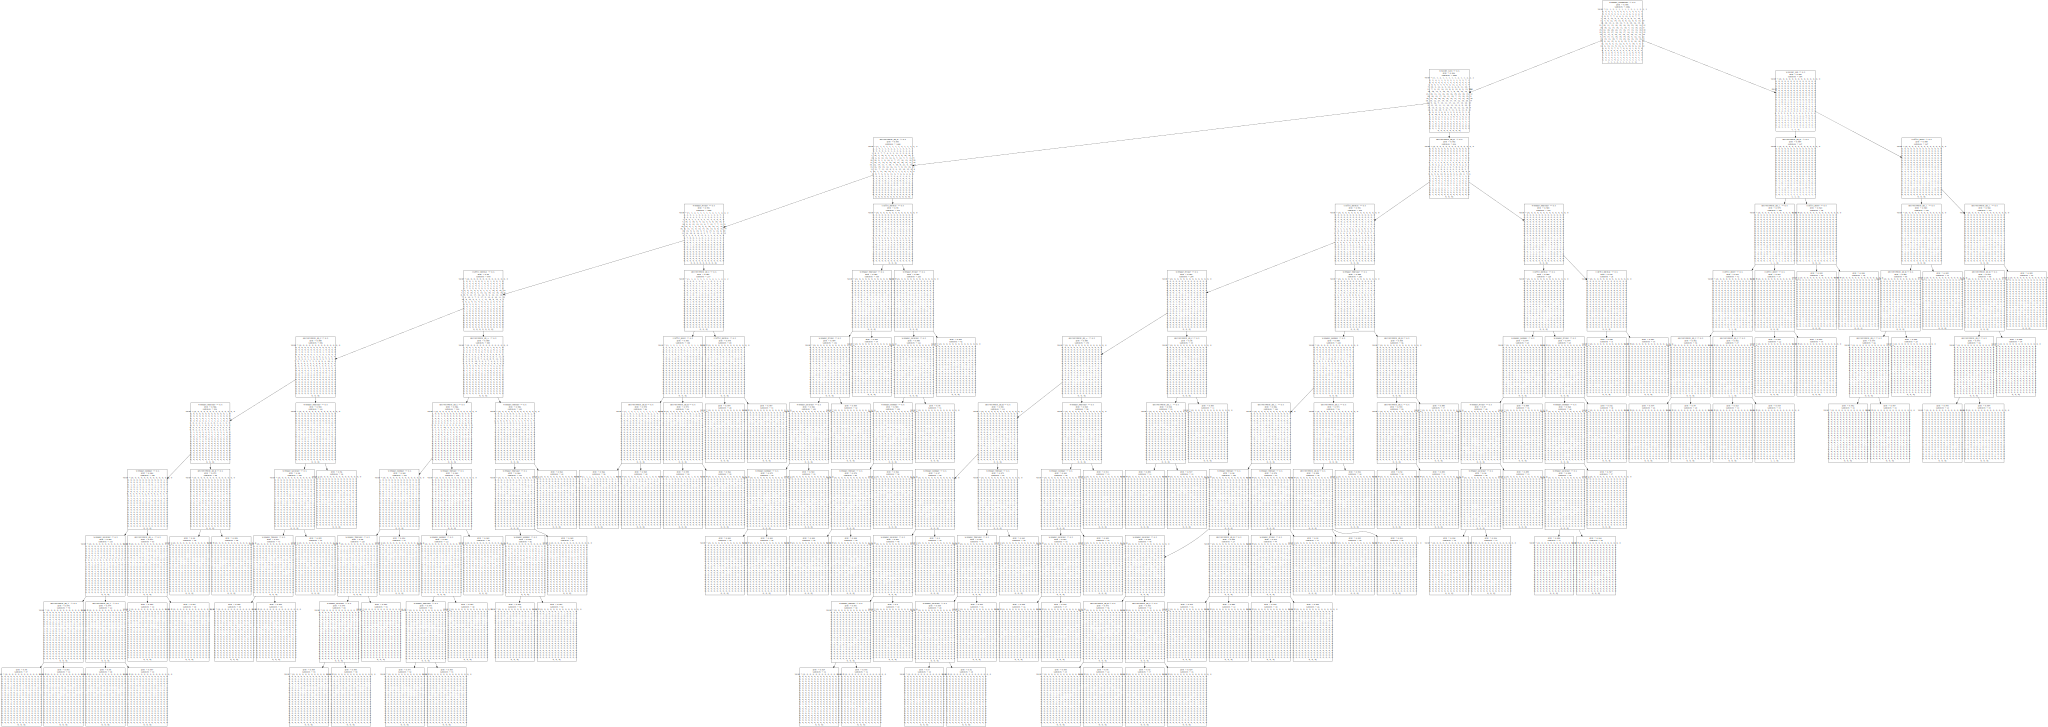

In [9]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(mdl, out_file=None,
                           feature_names=X_bin.columns.values)  
graph = graphviz.Source(dot_data)  
graph 